## 1. 자연어 처리 기초

In [1]:
!pip install konlpy -qq

In [19]:
import pandas as pd
import konlpy
from konlpy.tag import Okt


tokenizer = Okt()

In [3]:
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"

# 토큰화 ( 형태소 추출 )
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [5]:
# 토큰화 ( 명사 추출 )
tokenizer.nouns(text)

['탐험', '학교']

In [6]:
# 토큰화 (품사 태깅)

tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

### CountVectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# 단어 토큰화
words = tokenizer.morphs(text)

In [9]:
# 데이터 학습

vect.fit(words)

CountVectorizer()

In [10]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [11]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [12]:
# 사전 크기
len(vect.vocabulary_)

7

In [14]:
# 인코딩
df_t = vect.transform(words)

In [17]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [22]:
# 어휘와 피쳐 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [23]:
test = "AI 공부하며 함께 성장해요!"

In [26]:
words_test = tokenizer.morphs(test)
words_test

['AI', '공부', '하며', '함께', '성장해요', '!']

In [28]:
test_t = vect.transform(words_test)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [29]:
pd.DataFrame(test_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


### TF-IDF Vectorize

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vect = TfidfVectorizer()
words = tokenizer.morphs(text)

vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [33]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

## 2. 감정분석

### 1) 데이터 불러오기 (문제정의)

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

### 2) EDA 및 데이터 전처리

In [36]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [39]:
df.shape

(150000, 3)

In [38]:
df["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

- 비슷한 비율을 유지하고 있으므로 좋은 성능을 기대할 수 있다.

In [41]:
# 결측치 확인
df.isna().sum()

id          0
document    5
label       0
dtype: int64

- 5개 정도의 결측치는 삭제해도 무방

In [42]:
df.dropna(inplace = True)

In [43]:
# 피처 엔지니어링 ( 문장의 길이 )

df['len'] = df["document"].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<AxesSubplot:>

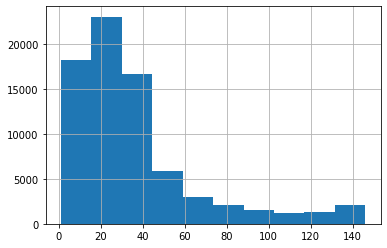

In [46]:
# len 시각화 ( label == 0 )
import matplotlib.pyplot as plt

df[df.label == 0]['len'].hist()

In [47]:
# 샘플링

df = df[:1000]
df.shape

(1000, 4)

In [48]:
# 토큰화

vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df["document"])

### 3) 머신러닝

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2000)
cross_val_score(model, vectors, df["label"], scoring='f1', cv=5)

array([0.67777778, 0.65088757, 0.69892473, 0.68020305, 0.62637363])

In [50]:
cross_val_score(model, vectors, df["label"], scoring='f1', cv=5).mean()

0.6668333509967952

## 자연어 전처리

### 어휘 사전 구축

In [54]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df=10) # 10번 이상 등장한 단어는 무시하라
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state = 2000)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.6620000000000001

In [55]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df=1) # 1 이하 등장한 단어는 무시하라
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state = 2000)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.696

### 불용어 (StopWord)

In [60]:
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ["하며", "ai"]

vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

### 띄어쓰기

 - 잘못된 띄어쓰기를 잡아줍니다

In [61]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git -qq

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.7.0 requires absl-py<2.0.0,>=0.9, but you have absl-py 2.1.0 which is incompatible.


In [62]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()

text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
spacing(text)

'함께 탐험하며 성장하는 AI 학교 AIFFEL'

### 반복되는 글자 정리
 - 반복되는 글자를 2-3개로 정리

In [63]:
!pip install soynlp -qq

In [64]:
from soynlp.normalizer import *
emoticon_normalize("하하하하하하하하하하 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ ")

'하하 ㅋㅋ'

### 맞춤법 검사기

In [65]:
!pip install git+https://github.com/jungin500/py-hanspell

  Cloning https://github.com/jungin500/py-hanspell to /tmp/pip-req-build-y8qhw_6t
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /tmp/pip-req-build-y8qhw_6t
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4845 sha256=933eb8a6b61fd0f3d088bdcb0f687d0fc9480bf2b8f855fa10669b018b09eda9
  Stored in directory: /tmp/pip-ephem-wheel-cache-lonvmb5y/wheels/65/95/29/5081934e2418613c2e986f8f0d7c55071a85d436f4367deeb2
Successfully built py-hanspell


In [66]:
from hanspell import spell_checker

In [67]:
text = '사생활치매. 안핵갈려요. 뺑손이사고. 권투를 빈다. 설흔 즈음에. 문안한 스타일. 거북암이 들다. 마음이 절여온다. 골이따분한 성격. 노력이 숲으로 돌아가다. 일해라 절해라 하지 마세요.'

In [70]:
result = spell_checker.check(text)

KeyError: 'result'

hanspell에 조금 문제가 있어서 아직 사용할 수 없음

In [ ]:
result.checked